In [2]:
import tensorflow as tf


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import tensorflow as tf
# import cv2
import numpy as np
# import pandas as pd
import os
# from sklearn.preprocessing import LabelEncoder
# from sklearn import preprocessing

In [4]:
import pandas as pd

In [5]:
from sklearn import preprocessing

In [6]:
import cv2

In [31]:
from PIL import Image
import os

image_directory = "output_images_new"

output_directory = "images_resized_500"

# Desired dimensions for the resized images
target_width = 500
target_height = 500

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_directory, filename)
        image = Image.open(image_path)

        resized_image = image.resize((target_width, target_height))

        output_path = os.path.join(output_directory, filename)
        resized_image.save(output_path)

        print(f"Resized and saved: {output_path}")


Resized and saved: images_resized_500\1000_2023-06-26-21-43-52-989465.jpg
Resized and saved: images_resized_500\1001_2023-06-26-21-43-57-053388.jpg
Resized and saved: images_resized_500\1002_2023-06-26-21-44-00-928649.jpg
Resized and saved: images_resized_500\1003_2023-06-26-21-44-04-883988.jpg
Resized and saved: images_resized_500\1004_2023-06-26-21-44-08-923158.jpg
Resized and saved: images_resized_500\1005_2023-06-26-21-44-12-658078.jpg
Resized and saved: images_resized_500\1006_2023-06-26-21-44-16-469797.jpg
Resized and saved: images_resized_500\1007_2023-06-26-21-44-20-208141.jpg
Resized and saved: images_resized_500\1008_2023-06-26-21-44-23-950267.jpg
Resized and saved: images_resized_500\1009_2023-06-26-21-44-27-830095.jpg
Resized and saved: images_resized_500\100_2023-06-26-20-49-22-864474.jpg
Resized and saved: images_resized_500\1010_2023-06-26-21-44-32-216621.jpg
Resized and saved: images_resized_500\1011_2023-06-26-21-44-36-033772.jpg
Resized and saved: images_resized_500\1

In [7]:
csv_file = "data_collection.csv"
columns = ['Serial_no','Timestamp', 'x_actual', 'y_actual', 'direction', 'x_step', 'y_step']
data_df = pd.read_csv(csv_file, header=None, names = columns)

serial_numbers = data_df['Serial_no'].astype(str).apply(lambda x: int(x.split(',')[0]))

image_folder = "images_resized_500"
imagess = []
parsed_custom_info = []

le = preprocessing.LabelEncoder()
data_df['direction'] = le.fit_transform(data_df['direction'])

# for index, info in enumerate(data_df[0]):



# serial_number = data_df['Serial_no.']
serial_numbers = set(data_df['Serial_no'])

date_time = data_df['Timestamp']
x_coordinate = data_df['x_actual']
y_coordinate = data_df['y_actual']
direction = data_df['direction']
x_step = data_df['x_step']
y_step = data_df['y_step']


image_files = os.listdir(image_folder)
imagess = []

for row in data_df.itertuples(index=False, name='data_df'):
    serial_number = row.Serial_no
    date_time = row.Timestamp
    x_coordinate = row.x_actual
    y_coordinate = row.y_actual
    direction = row.direction
    x_step = row.x_step
    y_step = row.y_step

    if ~(pd.isna(x_coordinate) and pd.isna(y_coordinate)):
        matching_files = [filename for filename in image_files if filename.startswith(str(serial_number))]
        if matching_files:
            image_name = matching_files[0]  # Assuming there is only one matching file
            image_path = os.path.join(image_folder, image_name)
            image = cv2.imread(image_path)
            imagess.append(image)
            parsed_custom_info.append([x_coordinate, y_coordinate, direction])

In [8]:
print(np.shape(parsed_custom_info))

(6930, 3)


In [9]:
data = list(zip(imagess, parsed_custom_info))


In [10]:
print(len(data))

6930


In [11]:
# Shuffle and split the dataset
np.random.shuffle(data)
train_ratio = 0.8
train_size = int(len(data) * train_ratio)

train_data = data[:train_size]
test_data = data[train_size:]

X_train = [item[0] for item in train_data]
Y_train = [item[1] for item in train_data]

X_test = [item[0] for item in test_data]
Y_test = [item[1] for item in test_data]

In [12]:
print(np.shape(train_data))

(5544, 2)


c:\Users\sushm\.conda\envs\tensorflow_gpu\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [13]:
print(train_size)

5544


In [14]:
print(np.shape(test_data))

(1386, 2)


In [15]:
print(len(X_train))

5544


In [16]:
print(np.shape(X_train))

(5544, 500, 500, 3)


In [17]:
print(np.shape(X_test))
print(np.shape(Y_train))
print(np.shape(Y_test))

(1386, 500, 500, 3)
(5544, 3)
(1386, 3)


In [18]:
data_df.head()

,Serial_no,Timestamp,x_actual,y_actual,direction,x_step,y_step
0,1,2023-06-26-20-43-04-249950,-17.193613,-37.061208,0,197,0
1,2,2023-06-26-20-43-08-099222,-24.902412,-36.644283,0,197,10
2,3,2023-06-26-20-43-11-831460,-24.730947,-36.479239,0,197,20
3,4,2023-06-26-20-43-20-858178,-21.770331,-37.052008,0,197,30
4,5,2023-06-26-20-43-24-684459,-20.622549,-36.728255,0,197,40


In [45]:
print(np.shape(X_train1))

(5544, 500, 500, 3)


In [49]:
X_train1 = np.array(X_train)
print(np.shape(X_train1))

(5544, 500, 500, 3)


In [19]:
from skimage.transform import resize

resized_images = []
for image in X_train:
    resized_image = resize(image, (32, 32))  # Resize image to (32, 32)
    resized_images.append(resized_image)

X_train1 = np.array(resized_images)


In [20]:
X_train1 = X_train1.astype('float32')

In [21]:
X_train1 /= 255

In [22]:
resized_images_test = []
for image in X_test:
    resized_image2 = resize(image, (32, 32))  # Resize image to (32, 32)
    resized_images_test.append(resized_image2)

X_test1 = np.array(resized_images_test)

In [23]:
X_test1 = X_test1.astype('float32')

In [24]:
X_test1 /= 255

In [25]:
print("Shape Y_train: ", np.shape(Y_train))

Shape Y_train:  (5544, 3)


In [26]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [27]:
from keras.layers import MaxPooling2D


In [28]:


X_train1 = np.array(X_train1)
Y_train = np.array(Y_train)

In [29]:
print("Shape Y_train: ", np.shape(Y_train))
print("Shape X_train: ", np.shape(X_train1))
print("Shape X_test: ", np.shape(X_test1))
print("Shape Y_test: ", np.shape(Y_test))

Shape Y_train:  (5544, 3)
Shape X_train:  (5544, 32, 32, 3)
Shape X_test:  (1386, 32, 32, 3)
Shape Y_test:  (1386, 3)


In [81]:
# Step 2: Model Architecture
model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='relu'))

# model.add(Dense(custom_info_dim, activation='softmax'))
# model.add(Dense(, activation='softplus')) 

In [31]:
# # Normalize the input data
# X_train2 = X_train1 / 255.0
# X_test2 = X_test / 255.0

# Check for any missing or invalid values
X_train2 = np.nan_to_num(X_train1)
X_test2 = np.nan_to_num(X_test)


In [32]:
Y_train = np.nan_to_num(Y_train)


In [92]:
# Step 3: Training
# model.compile(optimizer='adam', loss='categorical_crossentropy') mean_squared_error 
# model.compile(optimizer='adam', loss='mean_squared_error')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train1, Y_train, epochs=10, batch_size=32)  # Adjust the number of epochs and batch size as needed

Epoch 1/10
174/174 [==============================] - 2s 9ms/step - loss: nan
Epoch 2/10
174/174 [==============================] - 2s 9ms/step - loss: nan
Epoch 3/10
174/174 [==============================] - 1s 9ms/step - loss: nan
Epoch 4/10
174/174 [==============================] - 2s 9ms/step - loss: nan
Epoch 5/10
174/174 [==============================] - 2s 9ms/step - loss: nan
Epoch 6/10
174/174 [==============================] - 2s 9ms/step - loss: nan
Epoch 7/10
174/174 [==============================] - 2s 9ms/step - loss: nan
Epoch 8/10
174/174 [==============================] - 2s 9ms/step - loss: nan
Epoch 9/10
174/174 [==============================] - 2s 9ms/step - loss: nan
Epoch 10/10
174/174 [==============================] - 2s 9ms/step - loss: nan


In [40]:
# X_test1 = np.array(X_test1)
# Y_test = np.array(Y_test)

In [33]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(3))  # Output layer with 3 units for regression

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train1, Y_train, epochs=10, batch_size=32)

Epoch 1/10
174/174 [==============================] - 3s 14ms/step - loss: 73.5983
Epoch 2/10
174/174 [==============================] - 2s 13ms/step - loss: 36.8541
Epoch 3/10
174/174 [==============================] - 2s 13ms/step - loss: 37.0318
Epoch 4/10
174/174 [==============================] - 2s 13ms/step - loss: 36.5924
Epoch 5/10
174/174 [==============================] - 2s 13ms/step - loss: 36.9729
Epoch 6/10
174/174 [==============================] - 2s 14ms/step - loss: 36.9384
Epoch 7/10
174/174 [==============================] - 2s 13ms/step - loss: 36.5157
Epoch 8/10
174/174 [==============================] - 2s 14ms/step - loss: 36.5227
Epoch 9/10
174/174 [==============================] - 2s 14ms/step - loss: 36.6303
Epoch 10/10
174/174 [==============================] - 2s 14ms/step - loss: 36.5919


In [34]:
import matplotlib.pyplot as plt

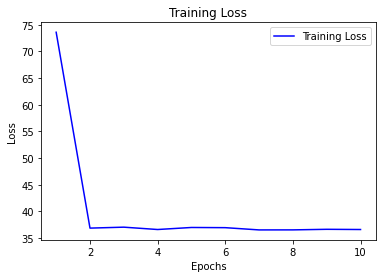

In [35]:

# Obtain the loss values from the training history
loss_values = history.history['loss']

# Plot the loss graph
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
# X_test_df = pd.DataFrame(X_test)
Y_test_df = pd.DataFrame(Y_test)
Y_train_df = pd.DataFrame(Y_train)

# Check for NaN values in X_test
# any_nans_X = X_test_df.isnull().values.any()

# Check for NaN values in Y_test
any_nans_Y = Y_test_df.isnull().values.any()
any_nans_Y_train = Y_train_df.isnull().values.any()


if  any_nans_Y:
    print("Test data contains NaN values.")

elif any_nans_Y_train:
    print("y train has nans")
else:
    print("Test data does not contain NaN values.")


Test data contains NaN values.


In [50]:
loss, accuracy = model.evaluate(X_test1, Y_test)


44/44 [==============================] - 0s 4ms/step - loss: nan


TypeError: 'float' object is not iterable

In [42]:
print('X_test shape:', X_test1.shape)
print('Y_test shape:', Y_test.shape)


X_test shape: (1386, 32, 32, 3)
Y_test shape: (1386, 3)


In [56]:
# Step 4: Evaluation
test_loss = model.evaluate(X_test1, Y_test1)
print('Test Loss:', test_loss)

44/44 [==============================] - 0s 7ms/step - loss: 37.1632
Test Loss: 37.163177490234375


In [54]:
Y_test1 = np.nan_to_num(Y_test)
X_test2 = np.nan_to_num(X_test1)

In [97]:
model.save("my_model.h5")


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [58]:
#Evaluation

Y_pred = model.predict(X_test1)

mse = mean_squared_error(Y_test1, Y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(Y_test1, Y_pred)

r2 = r2_score(Y_test1, Y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)


Mean Squared Error (MSE): 37.09458837337407
Root Mean Squared Error (RMSE): 6.090532683877008
Mean Absolute Error (MAE): 3.8562498615858813
R-squared (R2): -0.05753714773785649


In [59]:
Y_pred = model.predict(X_test1)

# tolerance threshold
tolerance = 0.1 

# Calculate the percentage of predictions within the tolerance
within_tolerance = np.mean(np.abs(Y_pred - Y_test) <= tolerance) * 100

print('Percentage of Predictions within a Tolerance:', within_tolerance)


Percentage of Predictions within a Tolerance: 0.9860509860509861


In [63]:
# Assuming you have trained the model and loaded the test dataset (X_test)

# Select a specific sample from X_test for prediction
sample_index = 6  # Replace with the index of the desired sample

# Reshape the sample to match the input shape of the model
sample = np.expand_dims(X_test1[sample_index], axis=0) 
##############
# resized_sample = cv2.resize(X_test[sample_index], (32, 32))
# X_test1 = X_test1.astype('float32')
# X_test[sample_index] /= 255
########################
# Reshape the sample to match the input shape of the model
# sample = np.expand_dims(resized_sample, axis=0) ##########################
# Make the prediction
prediction = model.predict(sample)

# Print the prediction
print('Prediction:', prediction)


Prediction: [[ -5.0094976  -31.795485     0.44651797]]


In [64]:
print(Y_test1[6])

[-15.01457258 -35.09379265   0.        ]


In [72]:
x_corr_max = data_df['x_actual'].max()
x_corr_min = data_df['x_actual'].min()

y_corr_max = data_df['y_actual'].max()
y_corr_min = data_df['y_actual'].min()

print("min x_actual:",x_corr_min)
print("max x_actual:",x_corr_max)
print("min y_actual:",y_corr_min)
print("max y_actual:",y_corr_max)

min x_actual: -24.902411819307858
max x_actual: 11.010352233852014
min y_actual: -37.718261747364686
max y_actual: -27.563701906036318
